### This dataset was obtained from the following GitHub repository:
###### https://github.com/mahesh147/Decision-Tree-Classifier/blob/bd03516e6ec6f2b26c3c381560dd403c11e3bc0d/Social_Network_Ads.csv

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [49]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [51]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [52]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

## we did preprocessing and now we know that our target(Purchase) have 2 class 0 and 1
##

In [53]:
X=df[['Gender',"Age","EstimatedSalary"]].values
y=df[["Purchased"]].values

In [54]:
X[0:5]

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ['Female', 27, 57000],
       ['Male', 19, 76000]], dtype=object)

In [55]:
print(np.unique( X[:,0]))

['Female' 'Male']


## from sklearn import preprocessing
### i used labelEncoder but we can use other ways like OrdinalEncoder
##### from sklearn.preprocessing import OrdinalEncoder

In [56]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
X[:, 0] = le_sex.transform(X[:, 0])

In [57]:
X[0:5]

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       [0, 27, 57000],
       [1, 19, 76000]], dtype=object)

## now all parts of our data is numeric and ready for classifier
###

### from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [59]:
adstree=DecisionTreeClassifier(criterion="entropy")
adstree

DecisionTreeClassifier(criterion='entropy')

In [60]:
adstree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [61]:
predtree=adstree.predict(X_test)

In [62]:
print("y test : ",y_test[:5])
print("\n y predict : ",predtree[:5])

y test :  [[0]
 [1]
 [1]
 [0]
 [0]]

 y predict :  [1 1 1 0 0]


## from sklearn import metrics

In [63]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

DecisionTrees's Accuracy:  0.8625


# the accuracy wasn't bad =0.875 (my random_state was 3)
# so now we should visualize our tree
##


### import graphviz
### from sklearn.tree import export_graphviz
### import pydotplus
### from IPython.display import Image

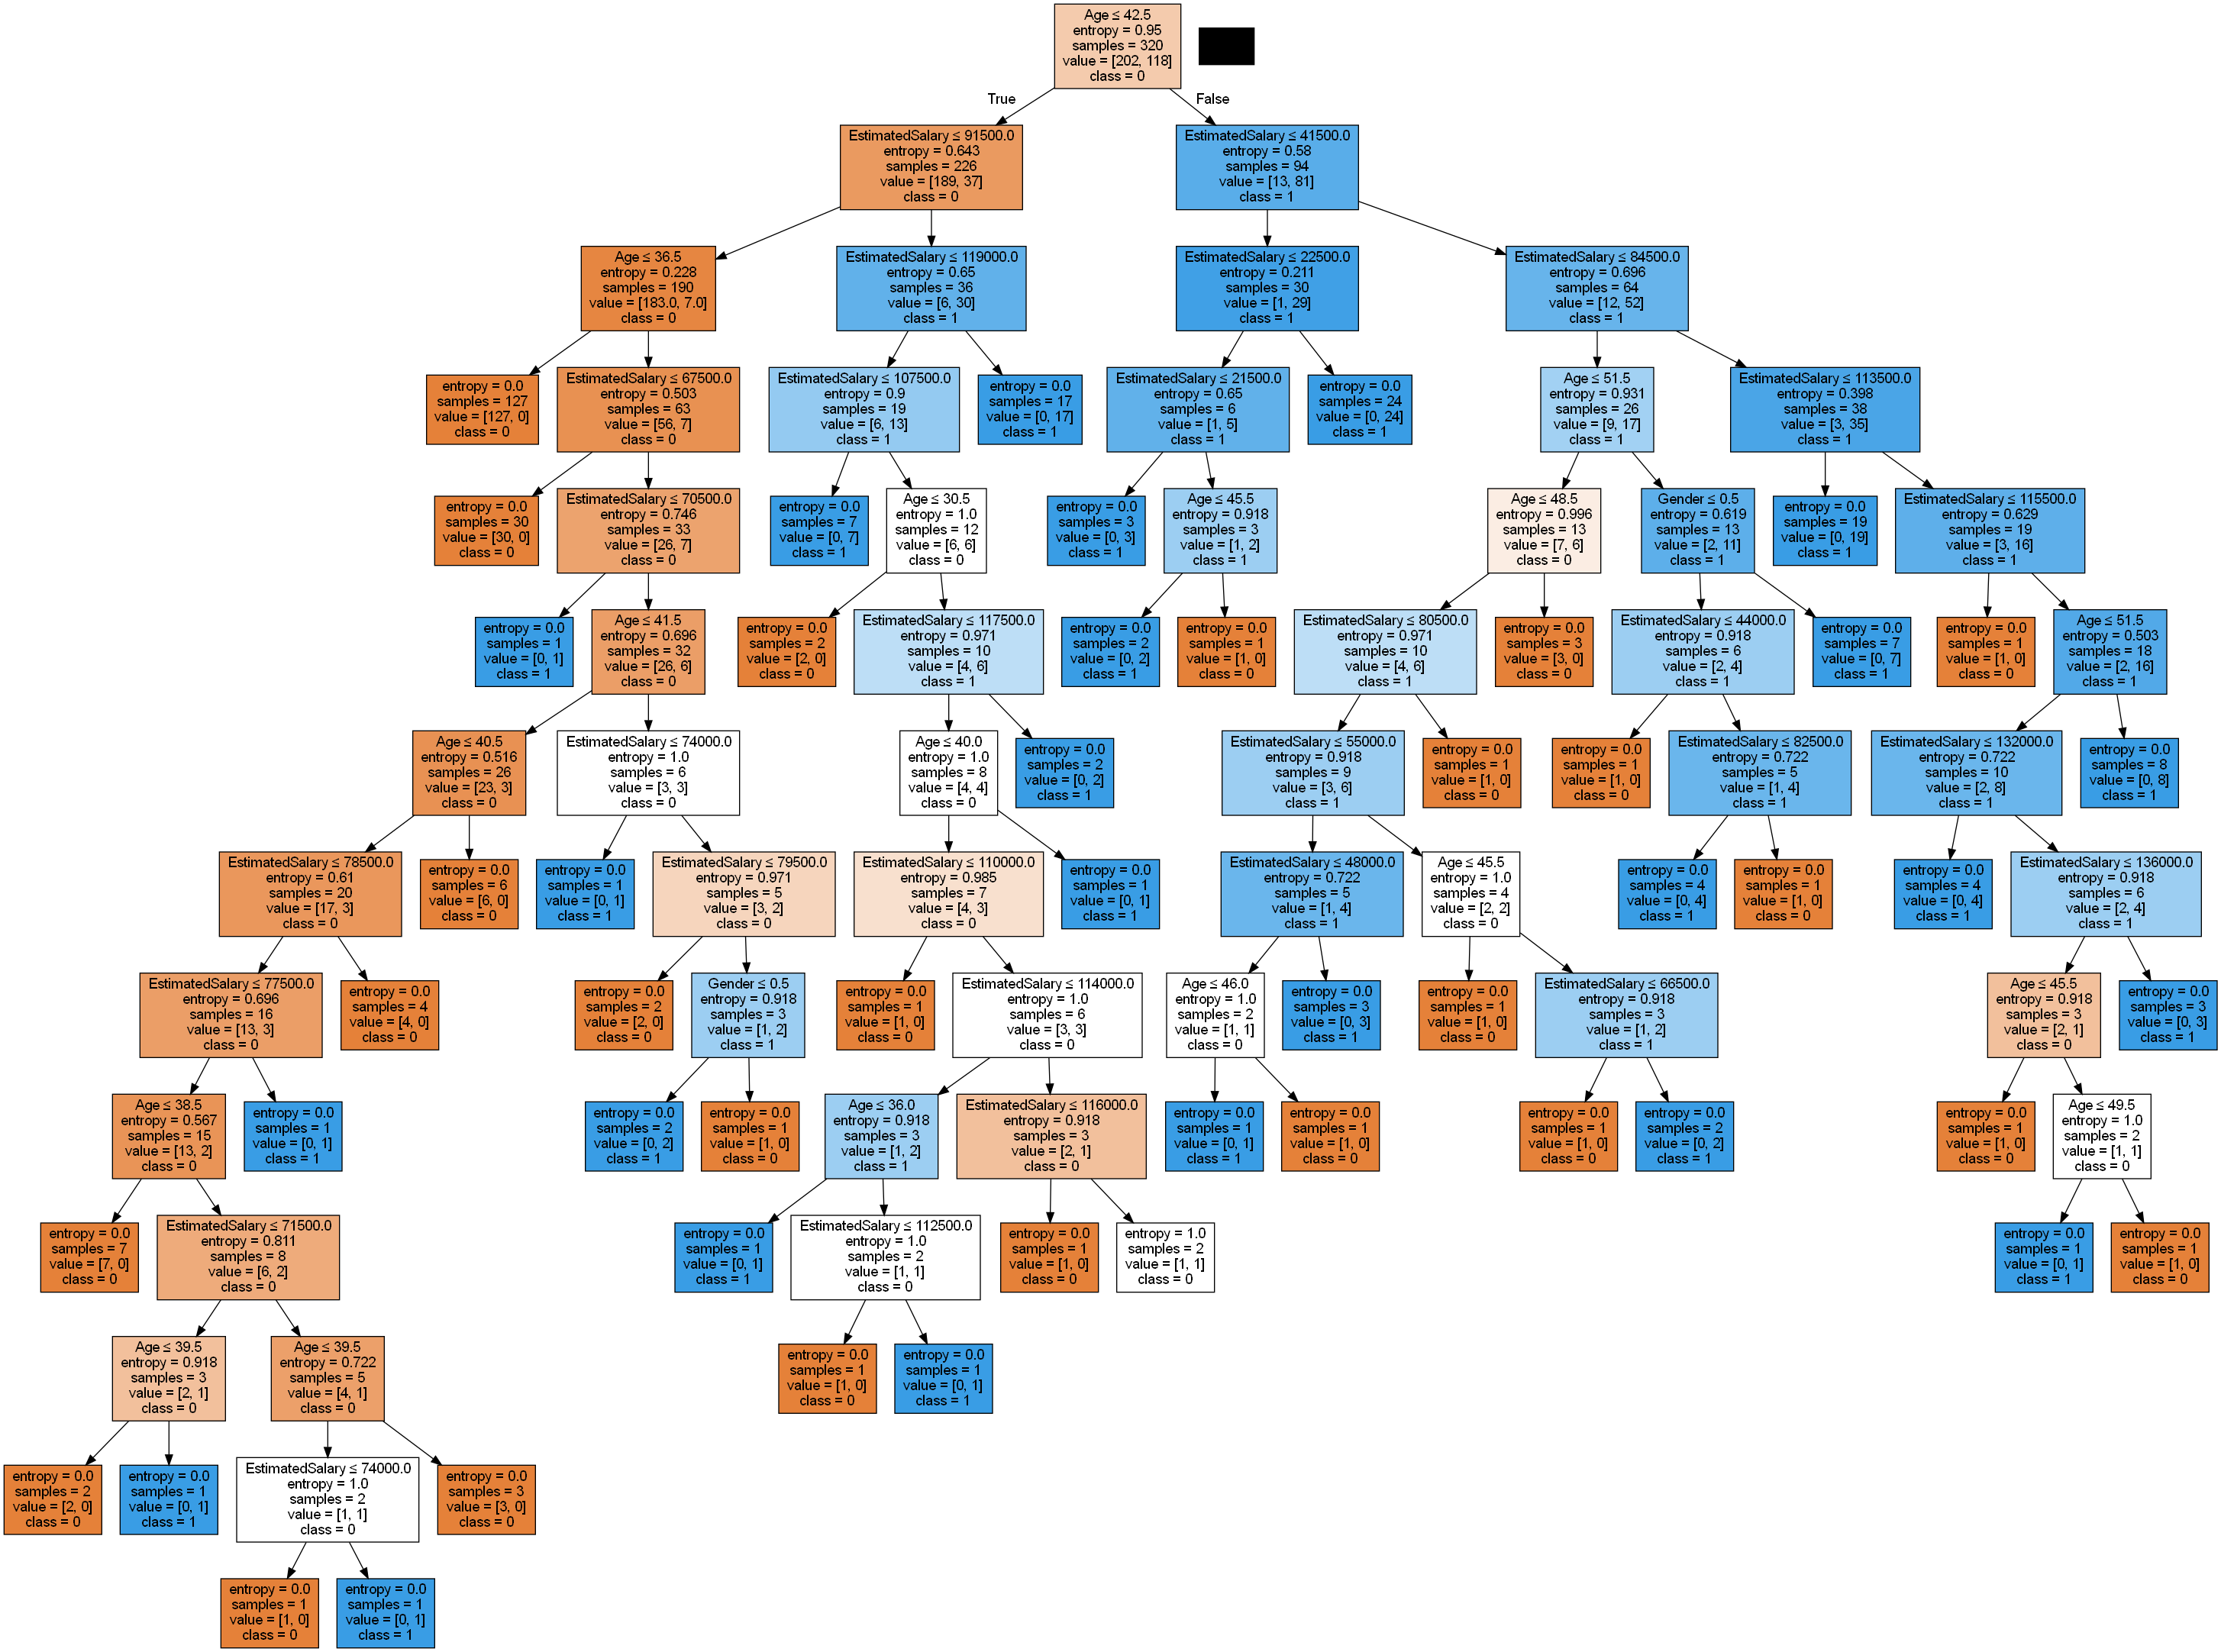

In [69]:
filename="ads_tree.png"
featurenames=df.columns[1:4]
dot_data=export_graphviz(adstree,feature_names=featurenames,class_names=np.unique(y_train).astype(str), filled=True,special_characters=True, rotate=False)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png(filename)
Image(filename=filename)

### from sklearn.tree import DecisionTreeClassifier, plot_tree

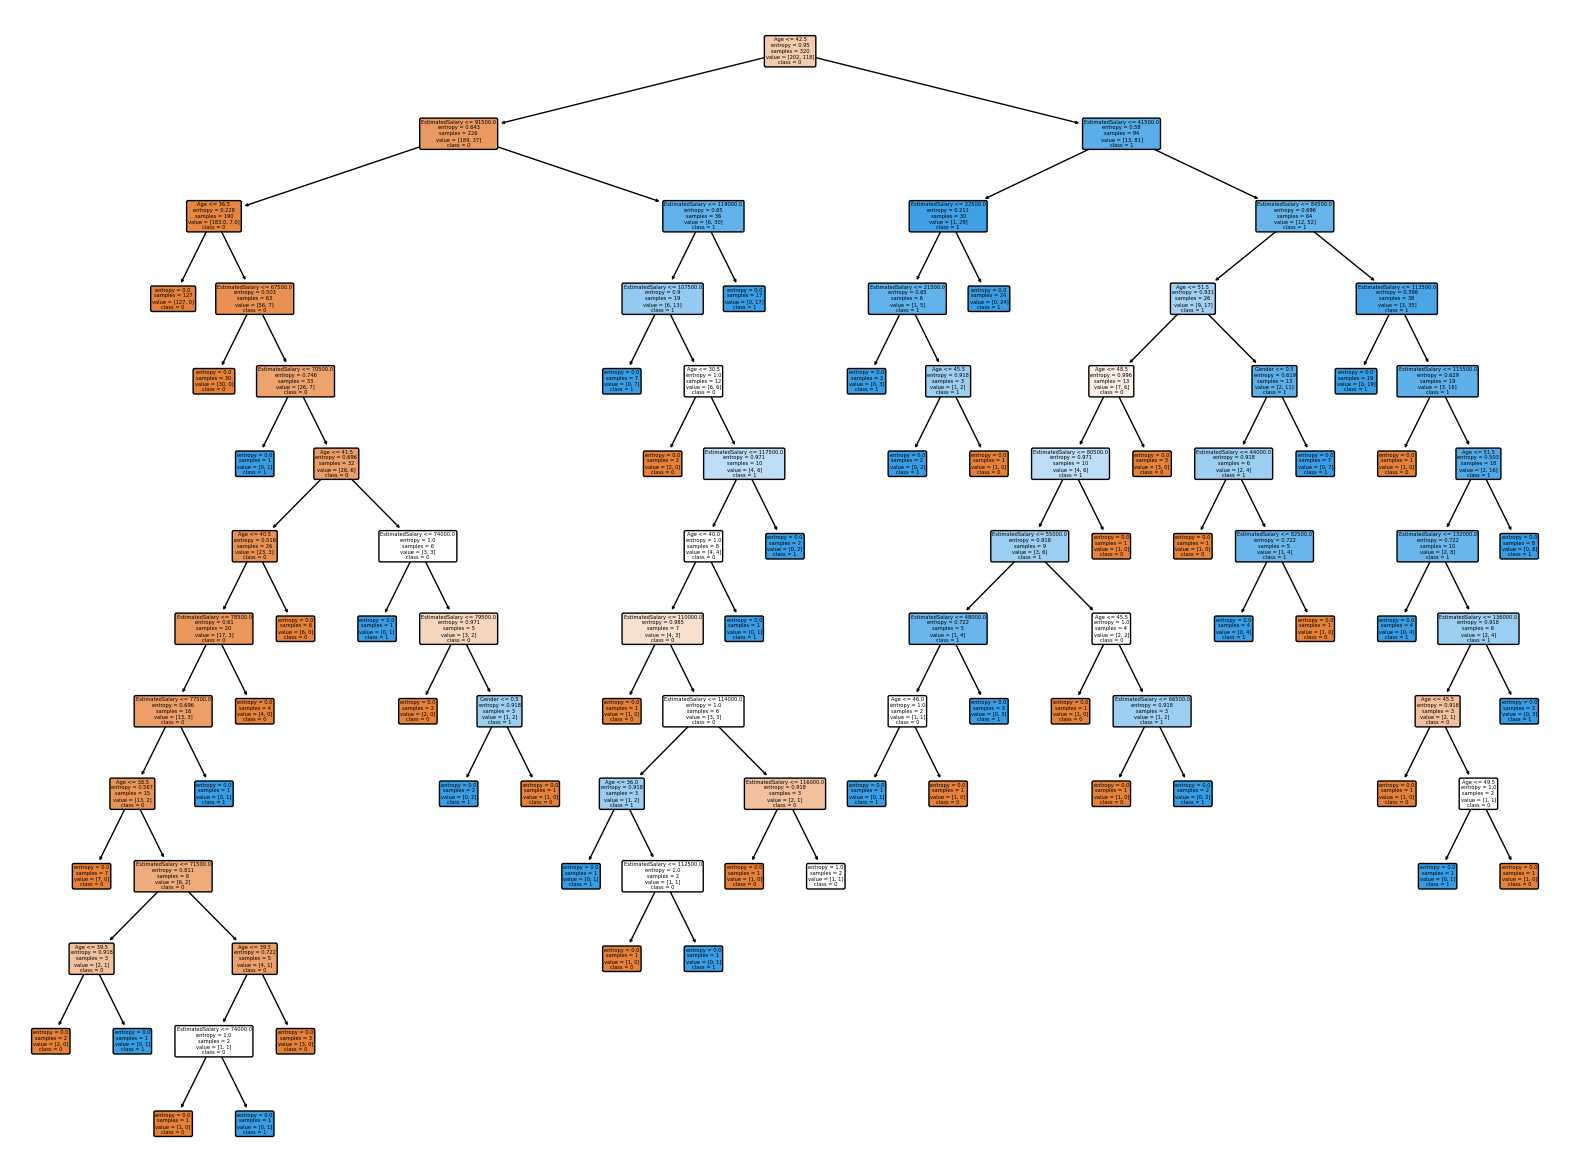

In [72]:
plt.figure(figsize=(20, 15))
plot_tree(adstree, filled=True, feature_names=featurenames, class_names=np.unique(y_train).astype(str), rounded=True)
plt.show()

https://github.com/mahesh147/Decision-Tree-Classifier/blob/master/Social_Network_Ads.csv